In [93]:
import pandas as pd
import h5py
import math
import numpy as np

In [94]:
resstock_data_path = "D:/DATA/resstock_baseline_metadata_and_annual_results_bycz.h5"

Upload and view resstock data

In [95]:
# f = h5py.File(resstock_data_path, "r")
# f.keys()

In [96]:
resstock_df = pd.read_hdf(resstock_data_path, "4A")
county = "G0500070"
resstock_df = resstock_df[resstock_df["in.county"] == county]
print(resstock_df.shape)

(405, 260)


In [97]:
new_col_names = []
for x in resstock_df.columns:
    y = x.split(".")
    y = (y[0], ".".join(y[1:]))
    new_col_names.append(y)
resstock_df.columns = pd.MultiIndex.from_tuples(new_col_names)
resstock_df.reset_index(drop=True, inplace=True)
resstock_df.head()

bldg_id upgrade      weight applicability      in  \
                                               sqft   
0      37       0  242.131013          True   333.0   
1     924       0  242.131013          True   853.0   
2    1103       0  242.131013          True  2176.0   
3    2454       0  242.131013          True  2176.0   
4    7192       0  242.131013          True  2176.0   

                                                              \
                    ahs_region ashrae_iecc_climate_zone_2004   
0  Non-CBSA West South Central                            4A   
1  Non-CBSA West South Central                            4A   
2  Non-CBSA West South Central                            4A   
3  Non-CBSA West South Central                            4A   
4  Non-CBSA West South Central                            4A   

                                                                            \
  ashrae_iecc_climate_zone_2004_2_a_split bathroom_spot_vent_hour bedrooms   
0                                      4A                   Hour4        1   
1                                      4A                   Hour4        2   
2                                      4A                  Hour22        3   
3                                      4A                   Hour6        4   
4                                      4A                   Hour5        4   

   ...                                                           out  \
   ... emissions.natural_gas.lrmer_low_re_cost_25_2025_start.co2e_kg   
0  ...                                           0.000000              
1  ...                                           0.000000              
2  ...                                        3336.145573              
3  ...                                        3457.165378              
4  ...                                           0.000000              

                                                             \
  emissions.propane.lrmer_low_re_cost_25_2025_start.co2e_kg   
0                                           0.000000          
1                                           0.000000          
2                                           0.000000          
3                                           0.000000          
4                                       13256.401667          

                                                              \
  emissions.electricity.lrmer_mid_case_15_2025_start.co2e_kg   
0                                        1295.800003           
1                                        2944.803313           
2                                        2082.441210           
3                                        6054.204864           
4                                        3022.085020           

                                                           \
  emissions.fuel_oil.lrmer_mid_case_15_2025_start.co2e_kg   
0                                                0.0        
1                                                0.0        
2                                                0.0        
3                                                0.0        
4                                                0.0        

                                                              \
  emissions.natural_gas.lrmer_mid_case_15_2025_start.co2e_kg   
0                                           0.000000           
1                                           0.000000           
2                                        3336.145573           
3                                        3457.165378           
4                                           0.000000           

                                                          \
  emissions.propane.lrmer_mid_case_15_2025_start.co2e_kg   
0                                           0.000000       
1                                           0.000000       
2                                           0.000000       
3                                           0.0

In [147]:
resstock_df[resstock_df.bldg_id == 546353][("in", "window_areas")]

403    F6 B6 L6 R6
Name: (in, window_areas), dtype: object

## Explore the data

In [98]:
# for x in resstock_df.loc[:, "in"].columns:
#     print(x)

In [99]:
# for x in resstock_df.loc[:, "out"].columns:
#     print(x)

In [100]:
["insulation_slab", "insulation_rim_joist", "insulation_foundation_wall"]
print(resstock_df.loc[:, ("in", "insulation_slab")].unique())
print(resstock_df.loc[:, ("in", "insulation_rim_joist")].unique())
print(resstock_df.loc[:, ("in", "insulation_foundation_wall")].unique())

['None' 'Uninsulated' '2ft R5 Under, Horizontal'
 '2ft R10 Perimeter, Vertical' '2ft R10 Under, Horizontal'
 '2ft R5 Perimeter, Vertical']
['Uninsulated' 'None' 'R-10, Exterior' 'R-15, Exterior' 'R-5, Exterior']
['Uninsulated' 'None' 'Wall R-10, Exterior' 'Wall R-15, Exterior'
 'Wall R-5, Exterior']


In [101]:
print(resstock_df.loc[:, ("in", "orientation")].unique())

['North' 'East' 'South' 'West' 'Southeast' 'Northwest' 'Southwest'
 'Northeast']


In [102]:
print(resstock_df.loc[:, ("in", "windows")].unique())

['Double, Clear, Metal, Air'
 'Double, Clear, Non-metal, Air, Exterior Clear Storm'
 'Double, Clear, Non-metal, Air'
 'Double, Clear, Metal, Air, Exterior Clear Storm'
 'Double, Low-E, Non-metal, Air, M-Gain'
 'Triple, Low-E, Non-metal, Air, L-Gain' 'Single, Clear, Non-metal'
 'Single, Clear, Metal' 'Single, Clear, Non-metal, Exterior Clear Storm'
 'Single, Clear, Metal, Exterior Clear Storm']


In [103]:
print(resstock_df.loc[:, ("in", "roof_material")].unique())

['Asphalt Shingles, Medium' 'Composition Shingles' 'Metal, Dark'
 'Tile, Clay or Ceramic' 'Wood Shingles' 'Slate' 'Tile, Concrete']


In [104]:
print(resstock_df.loc[:, ("in", "natural_ventilation")].unique()) 

['Cooling Season, 7 days/wk']


In [105]:
print(resstock_df.loc[:, ("out", "load.cooling.energy_delivered.kbtu")].sum()) 

11869933.0


In [106]:
print(resstock_df.loc[:, ("out", "params.flow_rate_mechanical_ventilation_cfm")].unique()) 

[0.]


In [107]:
resstock_df[resstock_df[("in", "natural_ventilation")] != 'Cooling Season, 7 days/wk'].shape

(0, 260)

## Definitions for lookups

In [108]:
EPD_BASELINE = 5.38 # Reference buildings apartment
LPD_BASELINE = 3.88 # Reference buildings apartment
ACH50_ACHNAT = 14.8 # LBL average for normal conditions
SQFT_M2 = 0.092903
F2F_HEIGHT = 3
RVAL_RSI = 1/5.678
PERIM_DEPTH = 5

VentilationPerArea = 0
VentilationPerPerson = 0
VentilationMode = 0
EconomizerSettings = 0
RoofMass = 2

hvac_cooling_type = {
    'Central AC': 1, 
    'None': 0, 
    'Heat Pump': 3, 
    'Room AC': 1
}

heating_fuel = {
    'Electricity': 1, 
    'Natural Gas': 0.85, 
    'Propane': 0.8, 
    'Other Fuel': 1, 
    'Fuel Oil': 0.8,
    'None': 0
}

lighting = {
    '100% CFL': 0.26, 
    '100% LED': 0.22, 
    '100% Incandescent': 1
}

def get_people_density(x):
    (occupants, sqft) = x
    if type(occupants) == str and "+" in occupants:
        occupants = 10
    occupants = int(occupants)
    return occupants / (SQFT_M2 * sqft)

def get_infiltration(x):
    (ach50, sqft) = x
    volume = SQFT_M2 * sqft * F2F_HEIGHT
    return float(ach50.split(" ACH50")[0]) / ACH50_ACHNAT *  volume / 3.6

wall_thermal_mass_constructions = {
    "Brick": 0,
    "Wood Stud": 2,
    "CMU": 1,
}

roof_thermal_mass_constructions = {
    'Asphalt Shingles, Medium': 2,
    'Composition Shingles': 2,
    'Wood Shingles': 2,
    'Metal, Dark': 3,
    'Slate': 2,
    'Tile, Clay or Ceramic': 2,
    'Tile, Concrete': 0,
    }

def get_wall_insulation(x):
    if "Uninsulated" in x:
        return 0.5
    else:
        return int(x.split("R-")[-1]) * RVAL_RSI

def get_slab_insulation(all_x):
    r_tot = [0]
    for x in all_x:
        if "None" in x:
            pass
        elif "Uninsulated" in x:
            r_tot.append(0.5)
        elif "R-" in x:
            x = x.split(",")
            x = [i for i in x if "R" in i]
            x = x[0]
            r_tot.append(int(x.split("R-")[-1]) * RVAL_RSI)
        else:
            x = x.split(" ")
            x = [i for i in x if "R" in i]
            x = x[0]
            r_tot.append(int(x.split("R")[-1]) * RVAL_RSI)
    return sum(r_tot) * RVAL_RSI
    
# From https://www.nrel.gov/docs/fy18osti/68670.pdf
windows_uval = {
    'Double, Clear, Metal, Air': 0.76 * 5.678,
    'Double, Clear, Metal, Air, Exterior Clear Storm': 0.38 * 5.678,
    'Double, Clear, Non-metal, Air': 0.49 * 5.678,
    'Double, Clear, Non-metal, Air, Exterior Clear Storm': 0.29 * 5.678,
    'Double, Low-E, Non-metal, Air, M-Gain': 0.29 * 5.678, # assumed
    'Single, Clear, Metal': 1.16 * 5.678,
    'Single, Clear, Metal, Exterior Clear Storm': 0.69 * 5.678,
    'Single, Clear, Non-metal': 0.84 * 5.678,
    'Single, Clear, Non-metal, Exterior Clear Storm': 0.4 * 5.678, 
    'Triple, Low-E, Non-metal, Air, L-Gain': 0.4 * 5.678,
} 

windows_shgc = {
    'Double, Clear, Metal, Air': 0.67,
    'Double, Clear, Metal, Air, Exterior Clear Storm': 0.51,
    'Double, Clear, Non-metal, Air': 0.56,
    'Double, Clear, Non-metal, Air, Exterior Clear Storm': 0.42,
    'Double, Low-E, Non-metal, Air, M-Gain': 0.52, # assumed
    'Single, Clear, Metal': 0.76,
    'Single, Clear, Metal, Exterior Clear Storm': 0.59,
    'Single, Clear, Non-metal': 0.63,
    'Single, Clear, Non-metal, Exterior Clear Storm': 0.51, 
    'Triple, Low-E, Non-metal, Air, L-Gain': 0.51,
} 

def get_perim2core(x):
    a = x / 10.7
    x = math.sqrt(a)
    core_area = (x-8)**2
    perim_area = a - core_area
    return core_area / perim_area

def get_core_depth(x, perim_depth = PERIM_DEPTH):
    core_area_to_perim_area = get_perim2core(x)
    return core_area_to_perim_area * perim_depth

def get_orientation(x):
    if x not in ['North' 'East' 'South' 'West']:
        return math.pi/4
    else:
        return 0

## Space definition

In [109]:
space_definition = {
  "area": {
    "name": "area",
    "resstock_path": ["sqft"],
    "resstock_format": lambda x: x / 10.7
  },
  "climate_zone": {
    "name": "epw",
    "resstock_path": ["ashrae_iecc_climate_zone_2004"],
    "resstock_format": lambda x: x #TODO get epw for climate zone
  },
  "city": {
    "name": "epw",
    "resstock_path": ["city"],
    "resstock_format": lambda x: x #TODO get epw for city if possible
  },
  "floors": {
    "name": "floors",
    "resstock_path": ["geometry_stories"],
    "resstock_format": lambda x: x
  },
  "width": {
    "name": "width",
    "min": 2,
    "max": 8,
    "mode": "Continuous",
    "resstock_path": None,
    "resstock_format": 3
  },
  "height": {
    "name": "height",
    "min": 2.5,
    "max": 6,
    "mode": "Continuous",
    "resstock_path": None,
    "resstock_format": 3
  },
  "perim_depth": {
    "name": "perim_depth", # assume square
    "min": 1.25,
    "max": 12,
    "mode": "Continuous",
    "resstock_path": None,
    "resstock_format": PERIM_DEPTH
  },
  "core_depth": {
    "name": "core_depth",
    "min": 1.25,
    "max": 60,
    "mode": "Continuous",
    "resstock_path": ["sqft"],
    "resstock_format": lambda x: get_core_depth(x)
  },
  "roof_2_footprint": {
    "name": "roof_2_footprint",
    "min": 0.0,
    "max": 1.0,
    "mode": "Continuous",
    "resstock_path": ["geometry_stories"],
    "resstock_format": lambda x: 1/x
  },
  "orientation": {
    "name": "orientation",
    "min": 0.0,
    "max": 6.283185307179586,
    "mode": "Continuous",
    "resstock_path": ["orientation"],
    "resstock_format": lambda x: get_orientation(x)
  },
  "ground_2_footprint": {
    "name": "ground_2_footprint",
    "min": 0.0,
    "max": 1.0,
    "mode": "Continuous",
    "resstock_path": ["geometry_stories"],
    "resstock_format": lambda x: 1/x
  },
  "wwr": {
    "name": "wwr",
    "min": 0.0,
    "max": 0.9,
    "mode": "Continuous",
    "resstock_path": ["window_areas"], # Format: "F18 B18 L18 R18"
    "resstock_format": lambda x: float(x.split(" ")[0].split("F")[1])/100
  },
  "cop_cooling": {
    "name": "cop_cooling",
    "min": 2,
    "max": 6,
    "mode": "Continuous",
    "resstock_path": ["hvac_cooling_type"],
    "resstock_format": lambda x: hvac_cooling_type[x]
  },
  "cop_heating": {
    "name": "cop_heating",
    "min": 0.5,
    "max": 6,
    "mode": "Continuous",
    "resstock_path": ["heating_fuel"], # Format: ['Electricity', 'Natural Gas', 'Propane', 'Other Fuel', 'Fuel Oil','None']
    "resstock_format": lambda x: heating_fuel[x]
  },
  "HeatingSetpoint": {
    "name": "HeatingSetpoint",
    "min": 14,
    "max": 24,
    "mode": "Continuous",
    "resstock_path": ["heating_setpoint"], # Format: F75
    "resstock_format": lambda x: (float(x.split("F")[0]) - 32) * 5 / 9
  },
  "CoolingSetpoint": {
    "name": "CoolingSetpoint",
    "min": 22,
    "max": 30,
    "mode": "Continuous",
    "resstock_path": ["cooling_setpoint"], # Format: 75F
    "resstock_format": lambda x: (float(x.split("F")[0]) - 32) * 5 / 9
  },
  "LightingPowerDensity": {
    "name": "LightingPowerDensity",
    "min": 0,
    "max": 30,
    "mode": "Continuous",
    "resstock_path": ["lighting"], # Format: ['100% CFL', '100% LED', '100% Incandescent']
    "resstock_format": lambda x: lighting[x]
  },
  "EquipmentPowerDensity": {
    "name": "EquipmentPowerDensity",
    "min": 0,
    "max": 60,
    "mode": "Continuous",
    "resstock_path": ["plug_loads"], # Format: "XXX%" # NOTE plug_load_diversity is to add variation to schedules
    "resstock_format": lambda x: float(x.split("%")[0]) / 100 * EPD_BASELINE
  },
  "PeopleDensity": {
    "name": "PeopleDensity",
    "min": 0,
    "max": 0.5,
    "mode": "Continuous",
    "resstock_path": ["occupants", "sqft"], # Format: int, "int", "+10"
    "resstock_format": lambda x: get_people_density(x)
  },
  "Infiltration": {
    "name": "Infiltration",
    "min": 0.0,
    "max": 0.001,
    "mode": "Continuous",
    "resstock_path": ["infiltration", "sqft"],  # Format: "X ACH50" + "natural_ventilation"?
    "resstock_format": lambda x: get_infiltration(x)
  },
  "VentilationPerArea": {
    "name": "VentilationPerArea",
    "min": 0.0,
    "max": 0.005,
    "mode": "Continuous",
    "resstock_path": None,
    "resstock_format": 0
  },
  "VentilationPerPerson": {
    "name": "VentilationPerPerson",
    "min": 0,
    "max": 0.015,
    "mode": "Continuous",
    "resstock_path": None,
    "resstock_format": 0
  },
  "VentilationMode": {
    "name": "VentilationMode",
    "option_count": 3,
    "mode": "Onehot",
    "resstock_path": None,
    "resstock_format": 0
  },
  "FacadeMass": {
    "name": "FacadeMass",
    "option_count": 4,
    "mode": "Onehot",
    "resstock_path": ["insulation_wall"],
    "resstock_format": lambda x: wall_thermal_mass_constructions[x.split(", ")[0]]
  },
  "RoofMass": {
    "name": "RoofMass",
    "option_count": 4,
    "mode": "Onehot",
    "resstock_path": ["roof_material"],
    "resstock_format": lambda x: roof_thermal_mass_constructions[x]
  },
  "FacadeRValue": {
    "name": "FacadeRValue",
    "min": 0.3,
    "max": 15,
    "mode": "Continuous",
    "resstock_path": ["insulation_wall"],
    "resstock_format": lambda x: get_wall_insulation(x)
  },
  "RoofRValue": {
    "name": "RoofRValue",
    "min": 0.3,
    "max": 18,
    "mode": "Continuous",
    "resstock_path": ["insulation_roof"],
    "resstock_format": lambda x: get_wall_insulation(x)
  },
  "SlabRValue": {
    "name": "SlabRValue",
    "min": 0.3,
    "max": 15,
    "mode": "Continuous",
    "resstock_path": ["insulation_slab", "insulation_rim_joist", "insulation_foundation_wall"],  # Format:
    "resstock_format": lambda x: get_slab_insulation(x)
  },
  "WindowUValue": {
    "name": "WindowUValue",
    "min": 0.3,
    "max": 7.0,
    "mode": "Continuous",
    "resstock_path": ["windows"],
    "resstock_format": lambda x: windows_uval[x]
  },
  "WindowShgc": {
    "name": "WindowShgc",
    "min": 0.05,
    "max": 0.99,
    "mode": "Continuous",
    "resstock_path": ["windows"],
    "resstock_format": lambda x: windows_shgc[x]
  },
  "EconomizerSettings": {
    "name": "EconomizerSettings",
    "option_count": 2,
    "mode": "Onehot",
    "resstock_path": None,
    "resstock_format": 0
  }
}

## Fetch data

### One building

In [110]:
sb_config = {}
i = 0
for k, data in space_definition.items():
    if data["resstock_path"]:
        if len(data["resstock_path"]) == 1:
            x = resstock_df.loc[i, ("in", data["resstock_path"][0])]
            sb_config[k] = data["resstock_format"](x)
        else:
            x = []
            # collected = []
            for j in data["resstock_path"]:
                x.append(resstock_df.loc[i, ("in", j)])
            sb_config[k] = data["resstock_format"](x)
    else:
        sb_config[k] = data["resstock_format"]

In [111]:
sb_config

{'area': 31.121495327102807,
 'climate_zone': '4A',
 'city': 'AR, Rogers',
 'floors': 2,
 'width': 3,
 'height': 3,
 'perim_depth': 5,
 'core_depth': 1.160567078486528,
 'roof_2_footprint': 0.5,
 'orientation': 0.7853981633974483,
 'ground_2_footprint': 0.5,
 'wwr': 0.18,
 'cop_cooling': 1,
 'cop_heating': 1,
 'HeatingSetpoint': 23.88888888888889,
 'CoolingSetpoint': 25.555555555555557,
 'LightingPowerDensity': 0.26,
 'EquipmentPowerDensity': 5.5952,
 'PeopleDensity': 0.032324069222770015,
 'Infiltration': 26.12896875,
 'VentilationPerArea': 0,
 'VentilationPerPerson': 0,
 'VentilationMode': 0,
 'FacadeMass': 0,
 'RoofMass': 2,
 'FacadeRValue': 2.6417752729834447,
 'RoofRValue': 3.3462486791123633,
 'SlabRValue': 0.17611835153222966,
 'WindowUValue': 4.31528,
 'WindowShgc': 0.67,
 'EconomizerSettings': 0}

### All buildings

In [112]:
sb_data = []
for i, row in resstock_df.iterrows():
    sb_config = {}
    sb_config["building_id"] = row["bldg_id"].iloc[0]
    for k, data in space_definition.items():
        if data["resstock_path"]:
            if len(data["resstock_path"]) == 1:
                x = row[("in", data["resstock_path"][0])]
                sb_config[k] = data["resstock_format"](x)
            else:
                x = []
                # collected = []
                for j in data["resstock_path"]:
                    x.append(row[("in", j)])
                sb_config[k] = data["resstock_format"](x)
        else:
            sb_config[k] = data["resstock_format"]
    sb_data.append(sb_config)

In [113]:
pd.DataFrame.from_dict(sb_data)

,building_id,area,climate_zone,city,floors,width,height,perim_depth,core_depth,roof_2_footprint,...,VentilationPerPerson,VentilationMode,FacadeMass,RoofMass,FacadeRValue,RoofRValue,SlabRValue,WindowUValue,WindowShgc,EconomizerSettings
0,37,31.121495,4A,"AR, Rogers",2,3,3,5,1.160567,0.5,...,0,0,0,2,2.641775,3.346249,0.176118,4.31528,0.67,0
1,924,79.719626,4A,"AR, Rogers",2,3,3,5,0.054673,0.5,...,0,0,2,2,3.346249,3.346249,0.088059,1.64662,0.42,0
2,1103,203.364486,4A,In another census Place,1,3,3,5,1.193736,1.0,...,0,0,0,2,2.641775,0.500000,0.088059,2.78222,0.56,0
3,2454,203.364486,4A,"AR, Rogers",1,3,3,5,1.193736,1.0,...,0,0,0,3,1.937302,0.500000,0.155088,2.15764,0.51,0
4,7192,203.364486,4A,"AR, Bentonville",2,3,3,5,1.193736,0.5,...,0,0,0,2,0.500000,0.500000,0.176118,2.78222,0.56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,542399,248.878505,4A,In another census Place,1,3,3,5,1.604560,1.0,...,0,0,0,2,1.937302,0.500000,0.088059,1.64662,0.52,0
401,543450,203.364486,4A,In another census Place,2,3,3,5,1.193736,0.5,...,0,0,2,2,0.500000,0.500000,0.176118,1.64662,0.52,0
402,544801,765.794393,4A,In another census Place,2,3,3,5,5.109021,0.5,...,0,0,0,2,1.937302,0.500000,0.088059,1.64662,0.52,0
403,546353,203.364486,4A,"AR, Rogers",1,3,3,5,1.193736,1.0,...,0,0,2,2,1.937302,0.500000,0.088059,2.78222,0.56,0


Needed values to generate space definition (* not needed for space definition, but overall loads):
- window construction 
- WWR
- conditioning
    - mechanical ventilation schedule (on/off/occupancy) - ASSUMED TO BE OFF FOR RES
    - heating/cooling fuel type / COP *
    - heat recovery
    - economizer
    - heating/cooling setpoints
- ventilation
    - infiltration
- construction
    - construction types (materials & thicknesses) 
- domestic hot water *
    - water supply temperature
    - water temperature inlet
    - flow rate per floor area *
    - hot water schedule
- internal loads
    - people density
    - EPD
    - LPD

FROM ELSEWHERE
- occupancy schedule
- lighting schedule
- equipment schedule

Get residential schedules

<Axes: >

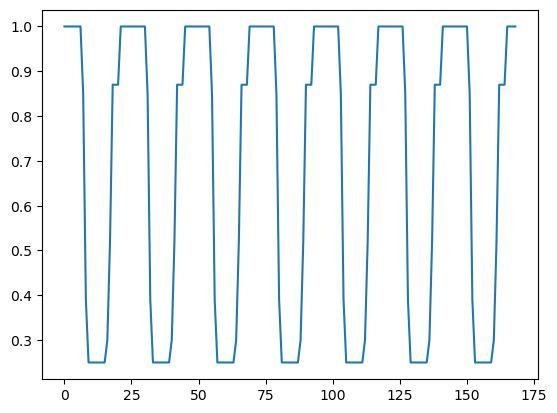

In [114]:
schedules = pd.read_hdf("./data/schedules_revised.h5")
scheds = schedules.loc[("RefBldgMidriseApartment")].to_numpy()
schedules.loc[("RefBldgMidriseApartment", "OccupancySchedule"), :24*7].plot()

In [115]:
# np.save("res_schedule.npy", scheds)

In [116]:
sb_data = pd.DataFrame.from_dict(sb_data)

In [117]:
schedule_names = [
    "EquipmentAvailabilitySchedule",
    "LightsAvailabilitySchedule",
    "OccupancySchedule",
]

index = pd.MultiIndex.from_product([schedule_names, list(range(8760))], names=["schedule", "hour"])

In [135]:
sb_data_withscheds = pd.DataFrame(index=sb_data.set_index(list(sb_data.columns)).index, columns=index, data=np.array([scheds.reshape((8760*3,)) for x in range(sb_data.shape[0])]))

In [136]:
sb_data_withscheds

schedule                                                                                                                                                                                                                                                                                                                                                                                                                                            EquipmentAvailabilitySchedule  \
hour                                                                                                                                                                                                                                                                                                                                                                                                                                                                         0      
building_id area       climate_zone city                    floors width height perim_depth core_depth roof_2_footprint orientation ground_2_footprint wwr  cop_cooling cop_heating HeatingSetpoint CoolingSetpoint LightingPowerDensity EquipmentPowerDensity PeopleDensity Infiltration VentilationPerArea VentilationPerPerson VentilationMode FacadeMass RoofMass FacadeRValue RoofRValue SlabRValue WindowUValue WindowShgc EconomizerSettings                                 
37          31.121495  4A           AR, Rogers              2      3     3      5           1.160567   0.5              0.785398    0.5                0.18 1           1.00        23.888889       25.555556       0.26                 5.5952                0.032324      26.128969    0                  0                    0               0          2        2.641775     3.346249   0.176118   4.31528      0.67       0                                           0.45   
924         79.719626  4A           AR, Rogers              2      3     3      5           0.054673   0.5              0.785398    0.5                0.30 0           1.00        23.888889       23.888889       0.26                 5.5952                0.012619      223.103207   0                  0                    0               2          2        3.346249     3.346249   0.088059   1.64662      0.42       0                                           0.45   
1103        203.364486 4A           In another census Place 1      3     3      5           1.193736   1.0              0.785398    1.0                0.12 1           0.85        20.000000       24.444444       0.26                 6.0794                0.009893      113.827099   0                  0                    0               0          2        2.641775     0.500000   0.088059   2.78222      0.56       0                                           0.45   
2454        203.364486 4A           AR, Rogers              1      3     3      5           1.193736   1.0              0.785398    1.0                0.09 1           0.85        20.000000       20.000000       1.00                 6.0794                0.019787      170.740649   0                  0                    0               0          3        1.937302     0.500000   0.155088   2.15764      0.51       0                                           0.45   
7192        203.364486 4A           AR, Bentonville         2      3     3      5           1.193736   0.5              0.785398    0.5                0.30 1           0.80        21.111111       18.333333       0.26                 6.0794                0.014840      341.481297   0                  0                    0               0          2        0.500000     0.500000   0.176118   2.78222      0.56       0                                           0.45   
...                                                                                                                                                                                                                                                     

In [ ]:
index

In [137]:
sb_data_withscheds.to_hdf("4A_test.h5", "in")

c:\Users\zoelh\AppData\Local\anaconda3\envs\ml-for-bem\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is a Python keyword: 'in'; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


## Scratch

In [20]:
building_results = pd.read_parquet("D:/DATA/resstock/1-0.parquet")
building_results.head(2)

,timestamp,out.electricity.ceiling_fan.energy_consumption,out.electricity.ceiling_fan.energy_consumption_intensity,out.electricity.clothes_dryer.energy_consumption,out.electricity.clothes_dryer.energy_consumption_intensity,out.electricity.clothes_washer.energy_consumption,out.electricity.clothes_washer.energy_consumption_intensity,out.electricity.cooling.energy_consumption,out.electricity.cooling.energy_consumption_intensity,out.electricity.cooling_fans_pumps.energy_consumption,...,out.total.lrmer_midcase_15__electricity.co2e_kg,out.total.lrmer_midcase_15__fuel_oil.co2e_kg,out.total.lrmer_midcase_15__natural_gas.co2e_kg,out.total.lrmer_midcase_15__propane.co2e_kg,out.total.lrmer_midcase_15.co2e_kg,out.total.lrmer_midcase_25__electricity.co2e_kg,out.total.lrmer_midcase_25__fuel_oil.co2e_kg,out.total.lrmer_midcase_25__natural_gas.co2e_kg,out.total.lrmer_midcase_25__propane.co2e_kg,out.total.lrmer_midcase_25.co2e_kg
bldg_id,,,,,,,,,,,,,,,,,,,,,
1,2018-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.05,5.675368898978434e-05,0.0,...,0.158476,0.0,0.315056,0.0,0.473532,0.166060,0.0,0.315056,0.0,0.481121
1,2018-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.05,5.675368898978434e-05,0.0,...,0.148175,0.0,0.287210,0.0,0.435385,0.154834,0.0,0.287210,0.0,0.442044


In [29]:
with open("D:/DATA/resstock/building_profiles.txt", "w") as f:
    f.writelines([i + "\n" for i in building_results.columns])


In [102]:
elec = [x for x in building_results.columns if 
        "out.electricity" in x 
        and "lighting" not in x 
        and "pv" not in x
        and "cooling" not in x 
        and "heating" not in x 
        and "total" not in x
        and "net" not in x
        and "_intensity" in x]
building_results[elec].sum(axis=1)

bldg_id
1    0.000243
1    0.000237
1    0.000232
1    0.000225
1    0.000219
       ...   
1    0.000296
1    0.000284
1    0.000278
1    0.000272
1    0.000261
Length: 8760, dtype: float64

In [103]:
elec

['out.electricity.ceiling_fan.energy_consumption_intensity',
 'out.electricity.clothes_dryer.energy_consumption_intensity',
 'out.electricity.clothes_washer.energy_consumption_intensity',
 'out.electricity.dishwasher.energy_consumption_intensity',
 'out.electricity.freezer.energy_consumption_intensity',
 'out.electricity.hot_water.energy_consumption_intensity',
 'out.electricity.mech_vent.energy_consumption_intensity',
 'out.electricity.permanent_spa_heat.energy_consumption_intensity',
 'out.electricity.permanent_spa_pump.energy_consumption_intensity',
 'out.electricity.plug_loads.energy_consumption_intensity',
 'out.electricity.pool_heater.energy_consumption_intensity',
 'out.electricity.pool_pump.energy_consumption_intensity',
 'out.electricity.range_oven.energy_consumption_intensity',
 'out.electricity.refrigerator.energy_consumption_intensity',
 'out.electricity.well_pump.energy_consumption_intensity']

In [105]:
lights = [x for x in building_results.columns if 
        "lighting" in x
        and "exterior" not in x
        and "garage" not in x
        and "_intensity" in x]
building_results[lights].sum()

out.electricity.lighting_interior.energy_consumption_intensity    0.0
out.natural_gas.lighting.energy_consumption_intensity             0.0
dtype: float64

RELEVANT COLUMNS

EPD:
out.electricity.plug_loads.energy_consumption

LPD
out.electricity.lighting_exterior.energy_consumption
out.electricity.lighting_exterior.energy_consumption_intensity
out.electricity.lighting_garage.energy_consumption
out.electricity.lighting_garage.energy_consumption_intensity
out.electricity.lighting_interior.energy_consumption
out.electricity.lighting_interior.energy_consumption_intensity

(out.electricity.total.energy_consumption)

outputs:
out.load.cooling.energy_delivered.kbtu
out.load.heating.energy_delivered.kbtu